# Displaying the Central Limit Theoream


This project was programmed in Python, using *[Anaconda](https://www.anaconda.com/) toolkit for our necessary statistics, as well as plotting libraries. It is displayed using *[Jupyter](https://jupyter.org/)* Notebook, a great playground that made displaying this code more interactive.
The code blocks can be ran independently and the code can be edited and reverted by the viewer. 

## Installing dependencies

Interacting with the python in this notebook will require you use Jupyter yourself. The way I use this is through VSCode with these extensions: 
The extensions can be found through copying the ID next to their name and pressing CTRL+SHIFT+P and typing `install extensions` and selecting the first result. Paste the code `ms-toolsai.jupyter` for example, into the search bar in the left panel.

Anaconda is essentially an all-in-one solution for most data sciene code in Python. Which I have installed which allows me access to all of this libraries. They can all be installed individually however if you want to avoid installing 300 MB or so for an environment. `pip install seaborn` for example, will install seaborn and its dependencies (which just so happen to include numpy, scip,y matplotlib)
### VSCode extensions

* Jupyter : ms-toolsai.jupyter
* Python : ms-python.python

I simply launch the project.ipynb and can click the individual green run arrows next to each code block below, or we can run it all at once sequentially. Markdown is supported in their own blocks, and you can add your own python code blocks as well.


Note: Seaborn marks `distplot` as a deprecated, but their replacement `displot` was not included in my Anaconda installation.


In [123]:
import matplotlib.pyplot as plt
import scipy
import scipy.stats as sp
import numpy as np
import seaborn as sns

from matplotlib.animation import FuncAnimation
from IPython import display
import sympy as sym
sym.init_printing()

import warnings
warnings.filterwarnings("ignore")



### Random Numbers
* Requirement: Generate random uniform (0,1) numbers and use the inverse CDF functions to create random numbers for each of the distributions. Repeat this at least 50,000 times for each distribution.

This function simply creates as many numbers as we want between 0 and 1. It is used elsewhere in the code, but you can uncomment some of the code and play with it to see how it functions. CTRL + Enter is a shortcut to run your code!

In [124]:
# This outputs n amount of numbers between 0 and 1.
def genNums(n):
    return np.random.uniform(0,1,n)

#print(genNums(20)) # Uncomment this code to see this function in action.

In [125]:
k = 5000 # Where k is amount of numbers between 0 and 1. 
rannums = genNums(k)

## Using random numbers to generate numbers in a distribution
 This example here uses the normal distribution. We first generate random numbers like above, and then use in the ppf function to create a dataset of random numbers in a normal distribution. We graph them on a histogram to show it fits the distribution.

In this example, the Normal Distribution is displayed. Because we ran the block above and generated *k* numbers in `rannums` that are all Uniform (between 0 and 1) we can use these numbers that fit the Normal Distribution (or really any distribution, as we will see throughout this notebook.)

`sp.norm.ppf(num)` results in a number within the uniform distribution with parameter `num` as the seed. We take these and append this generated normal number and store it in `normNums` array.

With all of these numbers we pass the `normNums` array into `sns.distplot()` which is a library with the function that dis


<AxesSubplot:ylabel='Density'>

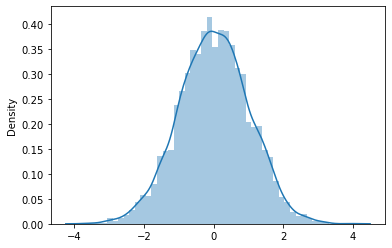

In [126]:
# Working on Normal Distribution
    
    
normNums = []

for num in rannums:
    normNums.append(sp.norm.ppf(num))
sns.distplot(normNums)


## Exponential Distribution

This is simply how we graph the exponential distribution in a similar way.

<AxesSubplot:ylabel='Density'>

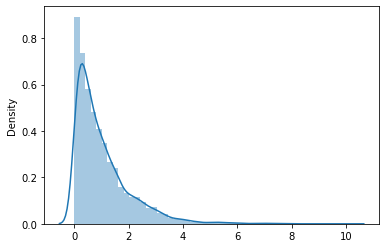

In [127]:
# Exponential
exponNums = []
for num in rannums:
    exponNums.append(sp.expon.ppf(num))
sns.distplot(exponNums)

### The Weibull Distribution
The Weibull distribution takes parameter c, and num in order to create a number that fits a weibull distribution.
This is how we can generate and display those numbers.

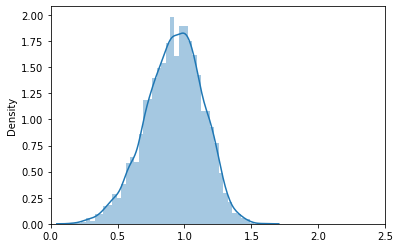

In [128]:
#Weibull
c = 5 #change this for skew
c2 = 20
weibulls = []
weibulls2 = []
for num in rannums:
    weibulls.append(sp.weibull_min.ppf(num, c))
    weibulls2.append(sp.weibull_min.ppf(num, c2))
sns.distplot(weibulls)
plt.xlim(0,2.5)
#sns.distplot(weibulls2, color="red") #Uncomment me to see the variable "c2" at action and see how Weibull scales.



### The Uniform Distribution

We can display the uniform distribution similarly to the rest, when K is very large we can actually see this 'plateau' become steeper and steeper- practically trending to a 90 degree angle.
Also interestingly since all of our numbers are generated randomly from uniform numbers- the exact graph is made when we just graph `rannums`. 

[<AxesSubplot:> <AxesSubplot:>]


<AxesSubplot:ylabel='Density'>

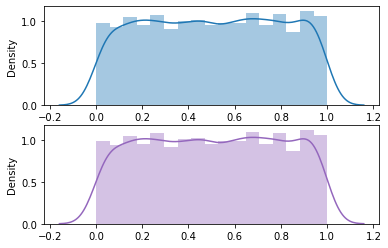

In [129]:
# Uniforrm
fix, axs = plt.subplots(2,1)
uniforms = []
for num in rannums:
    uniforms.append(sp.uniform.ppf(num))
print(axs)
sns.distplot(uniforms, ax=axs[0])
sns.distplot(rannums, ax=axs[1], color="tab:purple")

#sns.distplot(rannums) #Uncomment me to draw the original data!

## Inverse Triangle

## Inverse Triangle Class
This class contains all of the functions related to operating with the distribution. I wanted the naming conventions to be similar to the way other distributions were in scipy and treat the distribution as an "extension" of scipy. 

* The `pdf` simply returns the y-axis f(x) graph value for the x point put in. Fore xample pdf(x,2,4,6) will return 0.5.
* `cdf` is the output of the graph F(x) so 4 will output 0.5
* `ppf` is the inverse CDF of the pdf. It will return the x value when giving a y value. Or it will generate a number from a uniform value. 


In [130]:
class InvTri:
    def __init__(self, a=0, b=0, c=0):
         self.a = a
         self.b = b
         self.c = c
    @staticmethod
    def pdf(x,a,b,c):
        if x < a or x > c:
            return 0
        elif a <= x and x < b:
            return -4 * (x-b) / ((c-a) ** 2)
        elif b <= x and x <= c:
            return 4 * (x-b) / ((c-a) ** 2)
        else:
            raise Exception(f'Problem with function pdf(x,a,b,c) with parameters ({x}, {a}, {b}, {c})')
    def cdf(x): # This works great, for example cdf(4) = 0.5
        if x < 2:
            return 0
        if x > 6:
            return 1
        elif 2 <= x < 4:
            return -1 * ((x-6) * (x-2)) / 8
        elif 4 <= x <= 6:
            return 0.5 + (((x-8) * x ) / 8) + 2
        raise Exception(f'Problem with function ppf(x) with parameters ({x})')
    def ppf(x):
        if x < 0.5:
            return -2*np.sqrt(-2*x+1)-2
        else:
            return 2*np.sqrt(2*x-1)+2
        
    

# As an example, a=2, b=4, c=6, with x=4 our output y should be 0.5, the top left of the triangle.
l = InvTri.pdf(2,2,4,6)
sym.init_printing()
x = sym.Symbol('x')
InvTri.pdf(2,2,4,6), InvTri.cdf(0), InvTri.ppf(0)

## Graphing the inverse distribution
Here we generate the distribution. It is not exactly like a pyramid because of the graphic library, but it is symmetrical like the inverse distribution.

<AxesSubplot:ylabel='Density'>

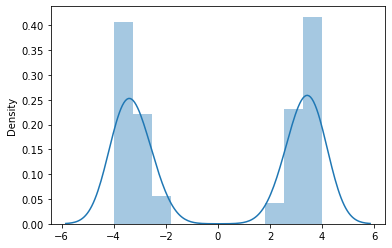

In [131]:
triNums = []
for num in rannums:
    triNums.append(InvTri.ppf(num))

sns.distplot(triNums)

In [132]:
def find_b(a, c):
    return (a + c) / 2
def find_h(a, c):
    return 2 / (c - a)

## Generate all data sets from random variables
Here we simply just create the arrays from the random numbers. The code blocks above are the individual versions, along with a way to print out the histogram after its changed to confirm its working.

If we generate a bunch of random numbers between 0 and 1 and we are going to put them into various distributions, we might as well use the same set. This function `genDataSet()` takes in a mutable array and generates numbers for the three distributions. When it is necessary to update or add new distributions, this is where we can generate these new numbers on a large scale for use with the rest of the other distributions.

In [133]:
# Generate all data sets TRIANGLE currently unused/unimplemented
# Where n is the amount of numbers between 0 and 1 generated.
uniforms = []
weibulls = [] #!! In order to keep information flowing
exponNums = []
triangles = []
c = 1.69 # Shape factor for the weibull
def genDataSet(uniformNums, weibullNums, exponNums, triangles, n):
    rannums = genNums(n)
    for num in rannums:
        uniformNums.append(sp.uniform.ppf(num))
        weibullNums.append(sp.weibull_min.ppf(num, c))
        exponNums.append(sp.expon.ppf(num))
        triangles.append(InvTri.ppf(num))

## Modify/Process the Data
In this section we generate sample averages of size n = 5, 30 and 100

This section is all about generating our data. There is primarily three takeaways in this block. `class Distro`, `takeStats(n,p)`, and `genDataSet()`

The `Distro` class is simply an object that allows us to have multiple sets of distributions generated by the same uniform numbers. This is what allows us to compare the number of sample averages visually. This is represented by `n` in the `takeStats(n,p)` function.

`takeStats(n,p)` will create a dataset of n numbers in each distribution, and will find the mean and add it to the array in Distro. It willd do this p times for p Means in each array.
It returns a new Distro, so we assign three different distros with 3 different sample averages, 5, 30 and 100.



In [134]:
# Distro Class is a way that we can store the entire datasets of our distributions while 
class Distro:
    def __init__(self):
        self.exMeans = []
        self.uniMeans = []
        self.weiMeans = []
        self.triMeans = []
# takeStats will create a dataset of n numbers in each distribution, and will find the mean and add it to the array in Distro. 
# It willd do this p times for p Means in each array.
def takeStats(n, p):
    distroSet = Distro()
    for i in range(p):
        uniforms = []
        weibulls = []
        exponNums = []
        triangles = []
        genDataSet(uniforms, weibulls, exponNums, triangles, n)
        distroSet.exMeans.append(scipy.mean(exponNums))
        distroSet.uniMeans.append(scipy.mean(uniforms))
        distroSet.weiMeans.append(scipy.mean(weibulls))
        distroSet.triMeans.append(scipy.mean(triangles))
    return distroSet





### Creating distributions from seperate sets of uniform numbers.
Now that `takeStats()` returns a distro, we can now have multiple distributions we we take 3 different sample averages for all the distributions each and store them with sample averages of 5, 30 and 100. This makes accessing them easy.

We also make some parent numbers which we know will tightly fit the distribution functions we are talking about so we can see which distributions (or parent functions) we are talking about.

In [135]:
# Create the "parent" distro graphs for the first row.
uniformsP = []
weibullsP = []
exponNumsP = []
triangleNumsP = []
genDataSet(uniformsP, weibullsP, exponNumsP, triangleNumsP, 500)
#Make a bunch of numbers
## ## 

distro1 = takeStats(100, 500)
distro2 = takeStats(30, 500)
distro3 = takeStats(5, 500)
print(distro1.exMeans[0]) # Just prints a number to indicate it is finished.

0.9187800701072375


## Graphing the Distros
Since distribution data is now stored under an "object" or class Distro, this block shows how we can access and graph a distro. For example here we access `distro1` which we made in the block above. This data graphs the means of exponential numbers generated by a random sets of uniform numbers. Which gives us our normal distribution shape.

<AxesSubplot:ylabel='Density'>

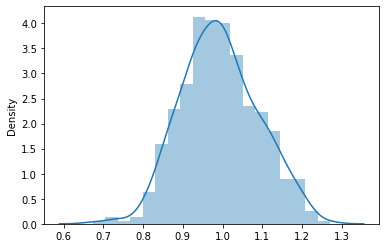

In [136]:
#fix, axs = plt.subplots(1,1) #This code is not required to actually get output in Jupyter, however when we want to graph mutliple graphs we will need stuff like this to arrange them as we will see later.
sns.distplot(distro1.exMeans)

## Making the final section
Here is some of the code required to render the data on a 4x4 area

Here we use seaborn to draw the histogram as well as trendline. We assign them to each corresponding a

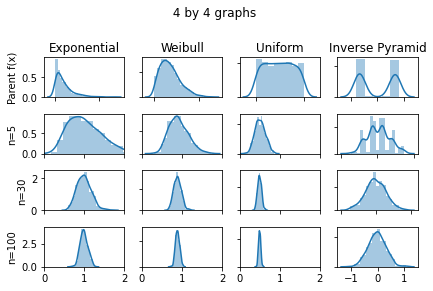

In [137]:

fig, axs = plt.subplots(4,4) #Creates our 4x4 grid, we access it through axs[].
fig.suptitle(' 4 by 4 graphs', y=1) #Set the main title.
for ax in axs.flat:
    ax.label_outer() # Removes number labels from the 
for i in range(3):
    for j in range(3):
        axs[i+1][j].set(xlim=(0,2))
        
axs[0,0].set_ylabel('Parent f(x)')
axs[1,0].set_ylabel('n=5')
axs[2,0].set_ylabel('n=30')
axs[3,0].set_ylabel('n=100')
    

#First row "parent" functions and setting the column titles.
sns.distplot(exponNumsP, ax=axs[0,0])
axs[0,0].set_title('Exponential')

sns.distplot(weibullsP, ax=axs[0,1])
axs[0,1].set_title('Weibull')


sns.distplot(uniformsP, ax=axs[0,2])
axs[0,2].set_title('Uniform')

sns.distplot(triangleNumsP, ax=axs[0,3])
axs[0,3].set_title('Inverse Pyramid') #[0,3] is the index column of the inverse Pyramid for axs.

#Plot all of the means from the different exponential distributions
sns.distplot(distro3.exMeans, ax=axs[1,0])
sns.distplot(distro2.exMeans, ax=axs[2,0])
sns.distplot(distro1.exMeans, ax=axs[3,0])
                                #different weibull distributions
sns.distplot(distro3.weiMeans, ax=axs[1,1])
sns.distplot(distro2.weiMeans, ax=axs[2,1])
sns.distplot(distro1.weiMeans, ax=axs[3,1])
                                #different uniform distributions
sns.distplot(distro3.uniMeans, ax=axs[1,2])
sns.distplot(distro2.uniMeans, ax=axs[2,2])
sns.distplot(distro1.uniMeans, ax=axs[3,2])

sns.distplot(distro3.triMeans, ax=axs[1,3])
sns.distplot(distro2.triMeans, ax=axs[2,3])
sns.distplot(distro1.triMeans, ax=axs[3,3])
plt.tight_layout()


This is some printing of the distributions overall(total?) means with their parameters

In [138]:
print(f'Distro 1: takeStats(100, 500)')
print(f'\tExponential Mean: {scipy.mean(distro1.exMeans)}')
print(f'\tWeibull Mean: {scipy.mean(distro1.weiMeans)}')
print(f'\tUniform Mean: {scipy.mean(distro1.uniMeans)}')
print(f'Distro 2: takeStats(30, 500)')
print(f'\tExponential Mean: {scipy.mean(distro2.exMeans)}')
print(f'\tWeibull Mean: {scipy.mean(distro2.weiMeans)}')
print(f'\tUniform Mean: {scipy.mean(distro2.uniMeans)}')
print(f'Distro 3: takeStats(5, 500)')
print(f'\tExponential Mean: {scipy.mean(distro3.exMeans)}')
print(f'\tWeibull Mean: {scipy.mean(distro3.weiMeans)}')
print(f'\tUniform Mean: {scipy.mean(distro3.uniMeans)}')

Distro 1: takeStats(100, 500)
	Exponential Mean: 0.9933822568480067
	Weibull Mean: 0.8885300708477171
	Uniform Mean: 0.4977130163362273
Distro 2: takeStats(30, 500)
	Exponential Mean: 0.9945723053963182
	Weibull Mean: 0.8880144865111327
	Uniform Mean: 0.4966340345820006
Distro 3: takeStats(5, 500)
	Exponential Mean: 1.036320369041233
	Weibull Mean: 0.9157028321179921
	Uniform Mean: 0.5138160235774517


In [139]:
print(scipy.std(distro3.weiMeans)) # Standard Deviation
print(scipy.std(distro2.weiMeans)) # Standard Deviation
print(scipy.std(distro1.weiMeans)) # Standard Deviation

0.2394451320590076
0.09377756236090562
0.05225656392845742


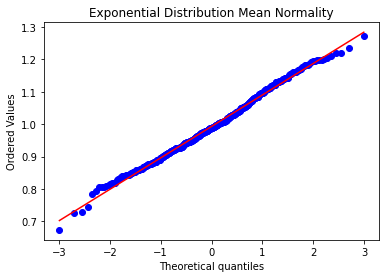

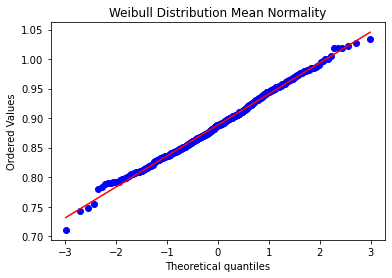

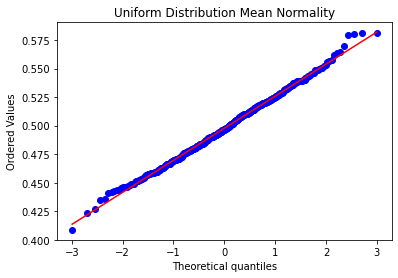

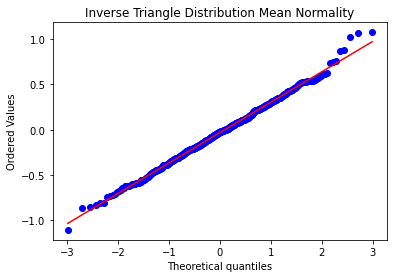

In [142]:
#ASSESS NORMALITY
#scipy.stats.normaltest(distro1.weiMeans)
#It looks like this function pretty much does what we need it to, but not in a format that's easily presentable.

# probplot
scipy.stats.probplot(distro1.exMeans, plot=plt)
plt.title('Exponential Distribution Mean Normality')
plt.show()

scipy.stats.probplot(distro1.weiMeans, plot=plt)
plt.title('Weibull Distribution Mean Normality')
plt.show()

scipy.stats.probplot(distro1.uniMeans, plot=plt)
plt.title('Uniform Distribution Mean Normality')
plt.show()

scipy.stats.probplot(distro1.triMeans, plot=plt)
plt.title('Inverse Triangle Distribution Mean Normality')
plt.show()

#Aside from visible deviations at the end, the CLT theorem holds up fairly well



## Conclusions/Observations

As we increase in n, but keep p a constant it appears to approach a certain value. It appears that it can be quite accurate however even with just 5 samples.

I guess the code isn't super efficient because doing the samples 50k times takes ~4 minutes so I did that ahead of time and got the above data for that much data.
```txt
Distro 1: takeStats(100, 500)
	Exponential Mean: 0.9963254163773608
	Weibull Mean: 0.8908399049235275
	Uniform Mean: 0.4991011737163576
Distro 2: takeStats(30, 500)
	Exponential Mean: 1.0120279281896885
	Weibull Mean: 0.8979927529819759
	Uniform Mean: 0.5020358760873931
Distro 3: takeStats(5, 500)
	Exponential Mean: 0.9923008484043381
	Weibull Mean: 0.8911992209114222
	Uniform Mean: 0.50008304265203
```
```
Distro 1: takeStats(100, 50000)
	Exponential Mean: 0.9982268170206662
	Weibull Mean: 0.891669044306355
	Uniform Mean: 0.49950124669404583
Distro 2: takeStats(30, 50000)
	Exponential Mean: 0.9980730525052542
	Weibull Mean: 0.892074201230576
	Uniform Mean: 0.5000233687680598
Distro 3: takeStats(5, 50000)
	Exponential Mean: 1.007297644413266
	Weibull Mean: 0.8966453071012951
	Uniform Mean: 0.502131566021633
```